In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

In [3]:
data = pd.read_csv("datasets/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [4]:
x = data.drop("Performance Index",axis="columns")
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [5]:
y = data['Performance Index']
y.head()

0    91
1    65
2    45
3    36
4    66
Name: Performance Index, dtype: int64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled,y_train)

y_pred_ridge = ridge.predict(x_test_scaled)
ridge_mse = mean_squared_error(y_test,y_pred_ridge)
ridge_rmse = root_mean_squared_error(y_test,y_pred_ridge)

m = ridge.coef_
c = ridge.intercept_

print("Ridge MSE:",ridge_mse)
print("Ridge RMSE:",ridge_rmse)
print("m:",m)
print("c:",c)
R2 = r2_score(y_test,y_pred_ridge)
print("R2:",R2)

score = cross_val_score(ridge,x_train_scaled,y_train,scoring="neg_mean_squared_error",cv=10)

mse_score = -score

print("Cross Validation Score:",score)
print("Bias^2 estimate:",mse_score.mean())
print("Variance:",mse_score.var())

Ridge MSE: 4.18287829667029
Ridge RMSE: 2.045208619351652
m: [ 7.40145543 17.63588086  0.80378338  0.54850951]
c: 55.31150000000001
R2: 0.9887127730821486
Cross Validation Score: [-4.15490762 -4.42721036 -4.62181717 -4.1539575  -4.16413904 -4.21498705
 -4.16923194 -4.44672712 -4.46615981 -3.87583406]
Bias^2 estimate: 4.269497164926696
Variance: 0.04246651037889042


In [14]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled,y_train)

lasso_y_pred = lasso.predict(x_test_scaled)

lasso_mse = mean_squared_error(y_test,lasso_y_pred)
lasso_rmse = root_mean_squared_error(y_test,lasso_y_pred)

m = lasso.coef_
c = lasso.intercept_

print("lasso MSE:",lasso_mse)
print("lasso RMSE:",lasso_rmse)
print("m:",m)
print("c:",c)
R2 = r2_score(y_test,lasso_y_pred)
print("R2:",R2)

score = cross_val_score(lasso,x_train_scaled,y_train,scoring="neg_mean_squared_error",cv=10)

mse_score = -score

print("Cross Validation Score:",score)
print("Bias^2 estimate:",mse_score.mean())
print("Variance:",mse_score.var())

lasso MSE: 4.265685489328154
lasso RMSE: 2.0653535991031062
m: [ 7.30341667 17.53803971  0.70459965  0.45104905]
c: 55.31150000000001
R2: 0.9884893232211514
Cross Validation Score: [-4.19192374 -4.54638208 -4.61899845 -4.20404906 -4.19320153 -4.27601199
 -4.17068254 -4.48722175 -4.48966915 -3.91265239]
Bias^2 estimate: 4.309079269080691
Variance: 0.04322957551765708


In [13]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(x_train_scaled,y_train)

elastic_y_pred = elastic.predict(x_test_scaled)

elastic_mse = mean_squared_error(y_test,elastic_y_pred)
elastic_rmse = root_mean_squared_error(y_test,elastic_y_pred)

m = elastic.coef_
c = elastic.intercept_

print("elastic MSE:",elastic_mse)
print("elastic RMSE:",elastic_rmse)
print("m:",m)
print("c:",c)
R2 = r2_score(y_test,elastic_y_pred)
print("R2:",R2)

score = cross_val_score(elastic,x_train_scaled,y_train,scoring="neg_mean_squared_error",cv=10)

mse_score = -score

print("Cross Validation Score:",score)
print("Bias^2 estimate:",mse_score.mean())
print("Variance:",mse_score.var())

elastic MSE: 5.396769911846253
elastic RMSE: 2.323094899449063
m: [ 6.99444242 16.74693046  0.72059441  0.48942663]
c: 55.31150000000001
R2: 0.9854371649619996
Cross Validation Score: [-5.25618062 -5.60940605 -5.24284725 -5.15651402 -5.21979411 -5.22014548
 -4.86850209 -5.33989528 -5.55712043 -4.89378474]
Bias^2 estimate: 5.23641900733
Variance: 0.051279503333437185


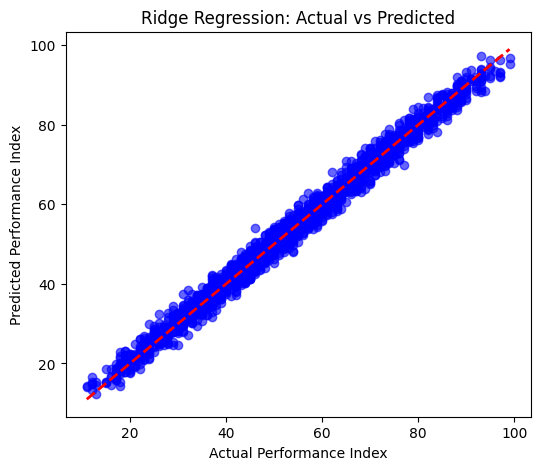

In [18]:
y_pred = ridge.predict(x_test_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

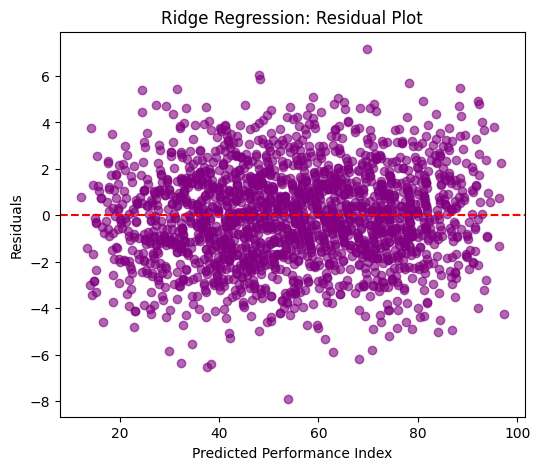

In [19]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Ridge Regression: Residual Plot")
plt.show()


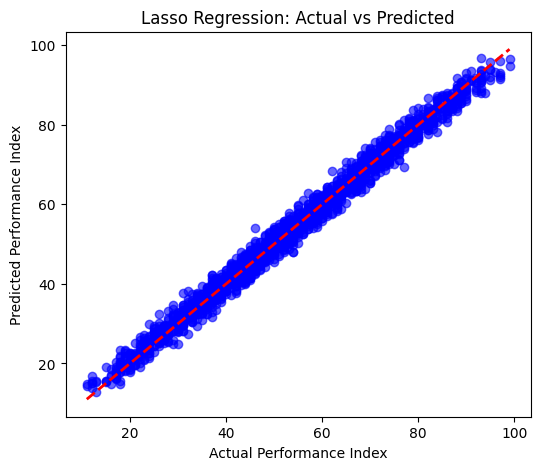

In [12]:
y_pred = lasso.predict(x_test_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()

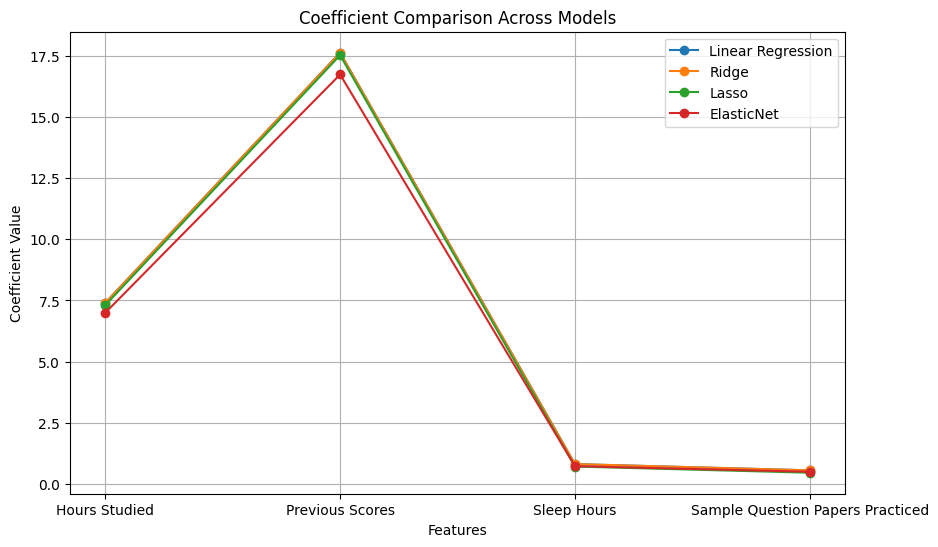

In [15]:
models = {
    'Linear Regression': LinearRegression().fit(x_train_scaled, y_train),
    'Ridge': Ridge(alpha=1.0).fit(x_train_scaled, y_train),
    'Lasso': Lasso(alpha=0.1).fit(x_train_scaled, y_train),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5).fit(x_train_scaled, y_train)
}

plt.figure(figsize=(10, 6))
for name, model in models.items():
    plt.plot(x.columns, model.coef_, marker='o', label=name)

plt.title("Coefficient Comparison Across Models")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


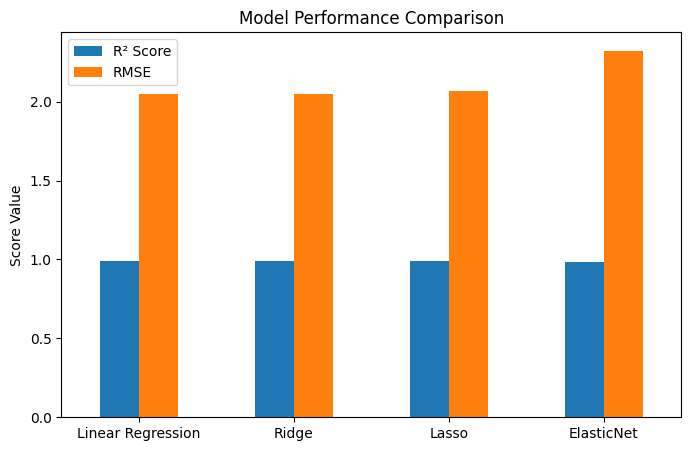

                   R² Score      RMSE
Linear Regression  0.988714  2.045056
Ridge              0.988713  2.045209
Lasso              0.988489  2.065354
ElasticNet         0.985437  2.323095


In [16]:
results = {}
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    results[name] = {
        'R² Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

df_results = pd.DataFrame(results).T

df_results.plot(kind='bar', figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score Value")
plt.xticks(rotation=0)
plt.show()

print(df_results)


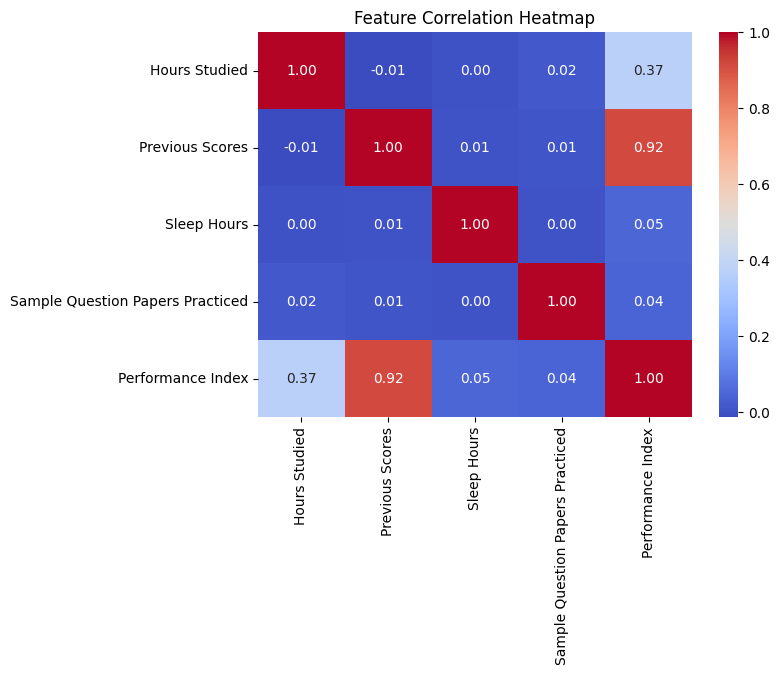

In [17]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
